In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, plot_roc_curve, RocCurveDisplay, roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 

In [3]:
# Q1
cancer_data = pd.read_csv('data.csv')
cancer_data = cancer_data.loc[:,['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,0.11840,0.27760
1,M,20.57,17.77,0.08474,0.07864
2,M,19.69,21.25,0.10960,0.15990
3,M,11.42,20.38,0.14250,0.28390
4,M,20.29,14.34,0.10030,0.13280


In [ ]:
# Q 2.1
use seaborn

In [4]:
# Q 2.2
x_train,x_test,y_train,y_test = train_test_split(cancer_data.loc[:,['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']],cancer_data['diagnosis'],test_size=0.2,random_state=777,stratify=cancer_data['diagnosis'])

In [ ]:
# Q 2.3
use logreg file for reference
make 4 diff models, index data using [0]
use only one feature in model


In [ ]:
# Q 2.4
use all features

In [ ]:
# Q 3.1

In [5]:
# Q 3.2
tree_model_1 = DecisionTreeClassifier(max_depth = 3)
tree_model_1 = tree_model_1.fit(x_train,y_train)
y_pred_1 = tree_model_1.predict(x_test)

tree_model_2 = DecisionTreeClassifier(max_depth = 5)
tree_model_2 = tree_model_2.fit(x_train,y_train)
y_pred_2 = tree_model_2.predict(x_test)



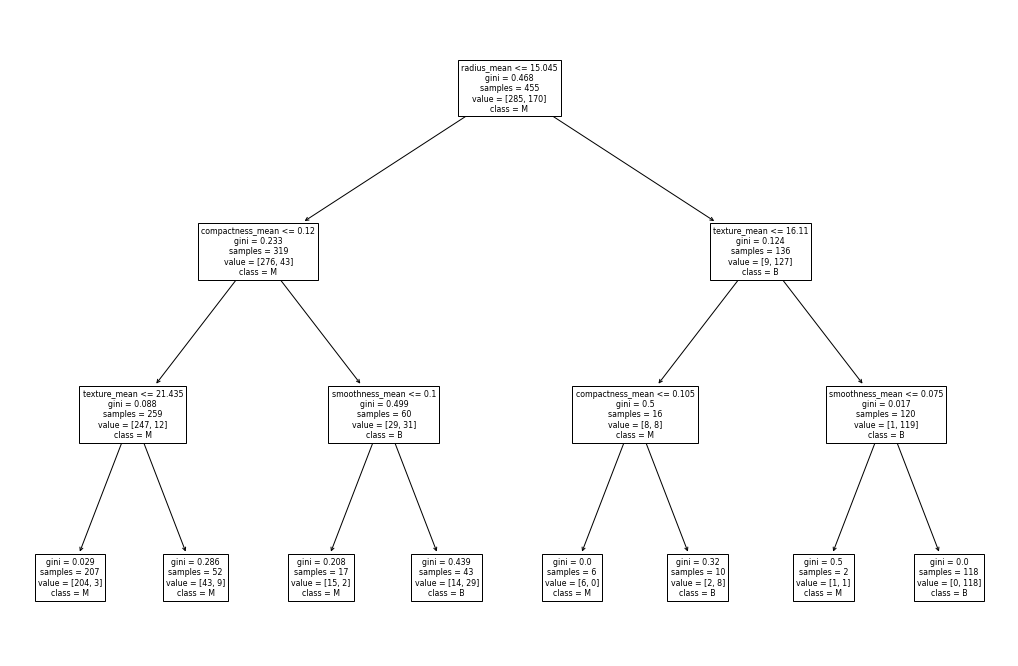

In [8]:
# plotting decision tree for model 1 with max depth of 3
%matplotlib inline
plt.figure(figsize=(18,12))
plot = tree.plot_tree(tree_model_1,feature_names = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], 
                      class_names = ['M','B'], max_depth = 3)
plt.show()

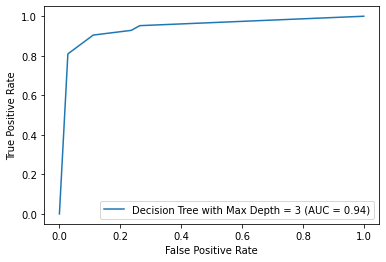

In [16]:
# calculating and plotting ROC curve for model 1
y_score_1 = tree_model_1.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_1[:,1], pos_label= 'M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
                            estimator_name='Decision Tree with Max Depth = 3')
display.plot()
plt.show()

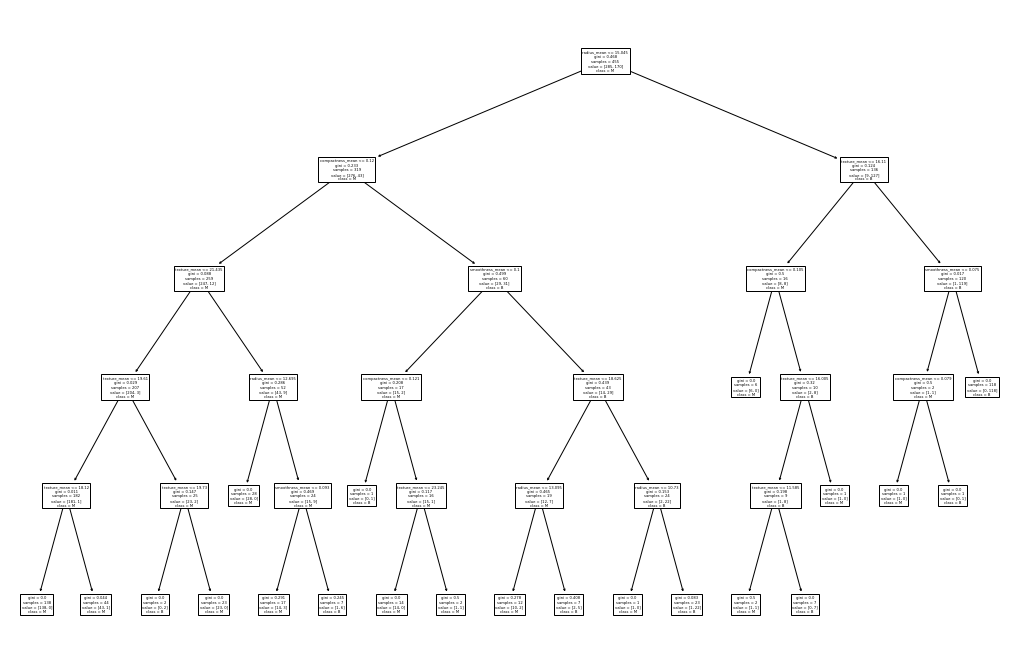

In [9]:
# plotting decision tree for model 2 with max depth of 5
%matplotlib inline
plt.figure(figsize=(18,12))
plot = tree.plot_tree(tree_model_2,feature_names = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], 
                      class_names = ['M','B'], max_depth = 5)
plt.show()

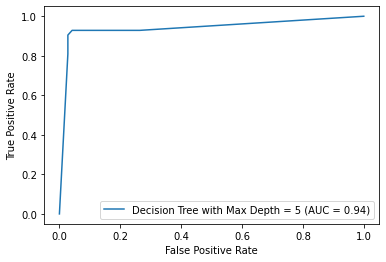

In [17]:
# calculating and plotting ROC curve for model 2
y_score_2 = tree_model_2.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_2[:,1], pos_label= 'M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
                            estimator_name='Decision Tree with Max Depth = 5')
display.plot()
plt.show()